In [1]:
!pip install --upgrade google-api-python-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.1.1
    Uninstalling google-auth-httplib2-0.1.1:
      Successfully uninstalled google-auth-httplib2-0.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [46]:
import warnings
warnings.filterwarnings('ignore')

from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [9]:
api_key = 'use your api key from google cloud'
channel_ids = ['UCzknLFsb2Kwj2IuVD9HnjKA', #Andie Ella
              'UCFGZTrhn2GbEsgQ8-12-rIA', #Ghaith Marwan
               'UChOPyo-uWLVi5uO53mSBX-w' #Noor Stars
              ]

youtube = build('youtube', 'v3', developerKey= api_key)

In [10]:
## function to get channel statistics
def get_channel_stats(youtube, channel_ids):
  all_data = []
  request = youtube.channels().list(
      part='snippet,contentDetails,statistics',
      id=','.join(channel_ids) )
  response = request.execute()

  for i in range(len(response['items'])):
    data = dict(Channel_name = response['items'][i]['snippet']['title'],
              Subscribers = response['items'][i]['statistics']['subscriberCount'],
              Views = response['items'][i]['statistics']['viewCount'],
              Total_videos = response['items'][i]['statistics']['videoCount'],
              Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'] )
    all_data.append(data)
  return all_data

In [11]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [12]:
channel_data = pd.DataFrame(channel_statistics)

In [13]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Noor Stars,20700000,2909703325,709,UUhOPyo-uWLVi5uO53mSBX-w
1,Andie Ella,568000,82530502,381,UUzknLFsb2Kwj2IuVD9HnjKA
2,Ghaith Marwan غيث مروان,6760000,1287675903,320,UUFGZTrhn2GbEsgQ8-12-rIA


In [14]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

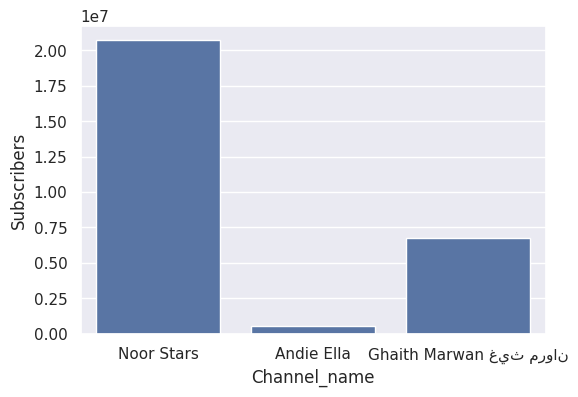

In [15]:
#Visualisation
sns.set(rc={'figure.figsize': (6,4)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

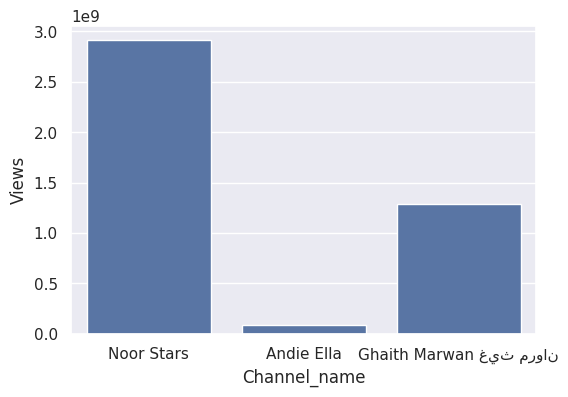

In [16]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

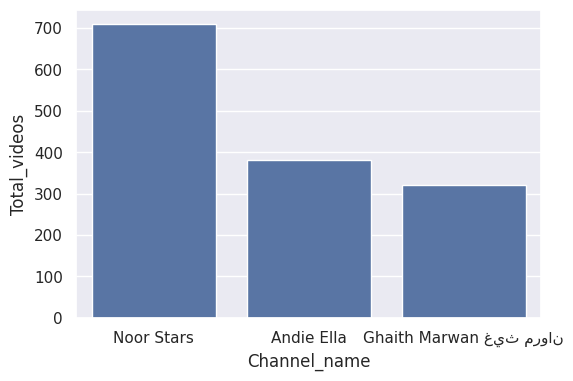

In [17]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

In [18]:
## Function to get videos id
def get_videos_id(youtube, playlist_id):

  request = youtube.playlistItems().list(
      part='contentDetails',
      playlistId = playlist_id,
      maxResults = 50)
  response = request.execute()

  videos_id = []
  for i in range(len(response['items'])):
      videos_id.append(response['items'][i]['contentDetails']['videoId'])

  #next_page_token = response.get('nextPageToken')
  #more_pages = True

  #while more_pages:
  #  if next_page_token is None:
  #   more_pages = False
  #  else:
  #     request = youtube.playlistItems().list(
  #             part='contentDetails',
  #              playlistId = playlist_id,
  #             maxResults = 50)
  #     response = request.execute()

  #      for i in range(len(response['items'])):
  #          videos_id.append(response['items'][i]['contentDetails']['videoId'])

   #     next_page_token = response.get('nextPageToken')

  return videos_id

In [19]:
playlist_id = channel_data['Playlist_id'][2]
videos_id = get_videos_id(youtube, playlist_id)
videos_id

['CVj7P9j4QNc',
 'nMUD0TN6pSU',
 'Xk3jX7VGT5I',
 '1X4wLU3loCI',
 'aI1lPt1Kv1Y',
 'zbbMYpSPXGM',
 '5DEkTquzrjk',
 'tFcU-Jc0Hxs',
 'ppSm-Y8Tess',
 'EPm52z0pOlk',
 '4Jvq1Tn-hFQ',
 'qEEKXok938A',
 'UJ_Cb1UnHQ8',
 'Zdpj4enfgBw',
 'nECIQXIgFEw',
 'rMh4oTIXaz8',
 'ZfyLxvVVqPM',
 'g5ff5vqKPVk',
 'lcgQXyH_sv8',
 'gFpCmOujcZo',
 'kxz4nkKZgJ0',
 '962IVePwDzM',
 '72O1RmK4Dac',
 'wiIu8cJyiho',
 'iDvyp67thB8',
 'wnT9DACgE64',
 '09yWPVafQPM',
 'Akb7mUaZ5jQ',
 'BlXzOCuqlRU',
 'nIh-KOCPndc',
 'YgpgLKGcr9w',
 'TpUN8dLpvB8',
 '_8NinfOlIFo',
 '_rCMXHMegzU',
 'mlefYMlmxlE',
 'rrxqOFbacGE',
 '6_ZAS_9gTpo',
 'l6gdux4ALOg',
 'SyrbMbbnBAs',
 'okM15g_EXvM',
 'wRZePPjtKf4',
 '2j9RadmzvDw',
 'pX81GFmX-ew',
 'GytF9eI7K-g',
 'ZpvZ_xLxF3I',
 'MngPb8MLL5s',
 'L96NmPJlmEo',
 '1_i5UYCKkwg',
 'z660UYLk7TM',
 'ia8mp7KvyTI']

In [38]:
## Function to get video details
def get_video_details(youtube, videos_id):

  all_videos_stats = []

  request = youtube.videos().list(
      part='snippet,statistics',
      id=','.join(videos_id))
  response = request.execute()
  for video in response['items']:
    video_stats = dict(Title = video['snippet']['title'],
                       Published_date = video['snippet']['publishedAt'],
                      Views =  video['statistics'].get('viewCount', 0),  # get() provide a default value if key is not present
                      Likes = video['statistics'].get('likeCount', 0),
                      Dislikes = video['statistics'].get('dislikesCount', 0),
                      Comments = video['statistics'].get('commentCount', 0)
                       )
    all_videos_stats.append(video_stats)

  return all_videos_stats

In [39]:
video_details = get_video_details(youtube, videos_id)

In [40]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,تحدي مين يعرفني اكثر ؟ زوجتي او اصدقائي,2024-05-01T13:57:28Z,2305417,143147,0,5760
1,مفاجأة عيد ميلادها تحولت ل مشكلة !! 😕,2024-04-23T13:13:07Z,4436174,219846,0,7060
2,مقلب الاستفزاز في سارة !! صرخت عليها 💔,2024-04-14T14:24:29Z,5040509,241330,0,7227
3,تحدي اللي ياخذ الهدية يخسر !! مع اليوتيوبرز 🎁 ✅,2024-04-04T14:38:49Z,4363167,210920,0,8570
4,تحدي من الاقوى بين البنات ؟ 👧🏼💪🏼,2024-03-30T14:40:45Z,3525338,166225,0,5826
5,عجلة الحظ تحدد مصيرك !! 🤯,2024-03-21T19:55:13Z,1951541,114761,0,3374
6,تحدي التعذيب 😩💔,2024-03-05T13:00:06Z,1587755,0,0,359
7,خليتها اتجرب أغرب برامج نظارة ابل !!  🤯,2024-02-22T14:08:25Z,2151313,94419,0,2837
8,رحلتنا في أكبر سفينة في العالم !! 🚢,2024-02-17T16:00:56Z,2370105,115846,0,3347
9,استأجرت حرامي عشان يسرق امي !! 🥷🏻,2024-02-02T14:30:04Z,4300704,206169,0,4524


In [43]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Dislikes'] = pd.to_numeric(video_data['Dislikes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Dislikes           int64
Comments           int64
dtype: object

In [44]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Dislikes,Comments
27,اخر شخص يخرج من الصندوق الثلجي يفوز !! 🧊🥶,2023-07-11,9269662,306947,0,7716
43,مقلب الرائحة الكريهة في لانا و لين !! 🤢 اكلت ا...,2023-04-06,9226935,288247,0,24882
34,عرسي 💍,2023-05-11,8960453,520163,0,40004
48,مقلب العملية في خطيبتي !! 🏥 🤕,2023-02-23,8181094,369565,0,6106
44,مقلب الاستفزاز في انس و اصالة !! 🤬 أكلت المقلب,2023-04-01,7951079,302362,0,25890
24,كشفنا فضايح يوم عرسنا !! 🤐👰🏻‍♀️,2023-08-12,7908308,368395,0,9056
39,تضاربنا مع مكس بسبب ضحى !! اكلت المقلب,2023-04-18,7803453,416811,0,10639
22,زوجتي مقلبتني و دمرت سيارتي !! 🤯🚙,2023-09-04,6560400,313265,0,7984
26,جولة في بيتنا الجديد !! 🏡 🤍,2023-07-30,6467756,344274,0,21185
31,اخدتها على اكبر سفينة في العالم !! 🚢 😍,2023-06-03,6026346,247807,0,9363


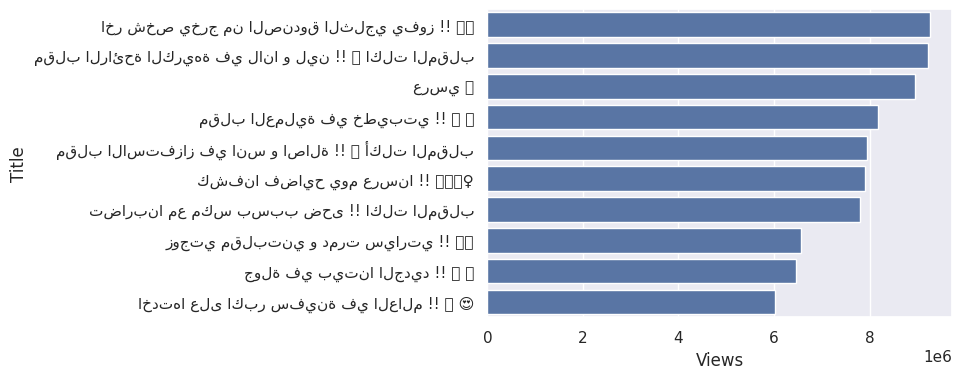

In [47]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [48]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [49]:
videos_per_month = video_data.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,11
1,Aug,3
2,Dec,3
3,Feb,5
4,Jan,2
5,Jul,2
6,Jun,4
7,Mar,6
8,May,6
9,Nov,2


In [50]:
sort_order = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
              'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [51]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [53]:
videos_per_month.sort_index()

,Month,size
Month,,
Jan,Jan,2
Feb,Feb,5
Mar,Mar,6
Apr,Apr,11
May,May,6
Jun,Jun,4
Jul,Jul,2
Aug,Aug,3
Sep,Sep,5


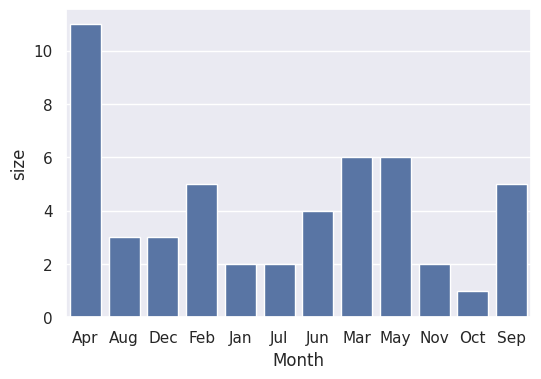

In [54]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)